In [142]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_excel('dataset.xlsx')

In [9]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [13]:
df = data.copy()

In [16]:
df.shape

(5644, 111)

<AxesSubplot:ylabel='None'>

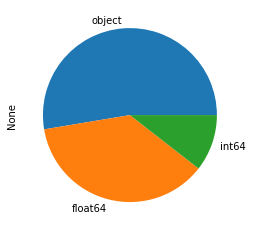

In [65]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:>

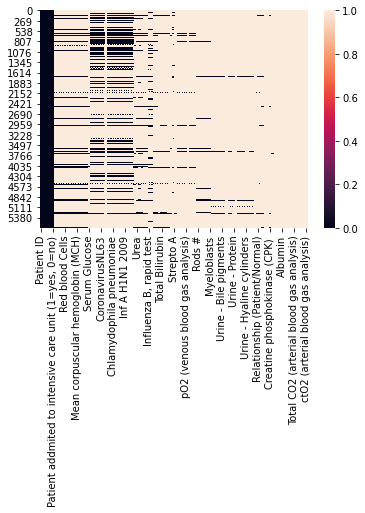

In [24]:
sns.heatmap(df.isna())

<AxesSubplot:>

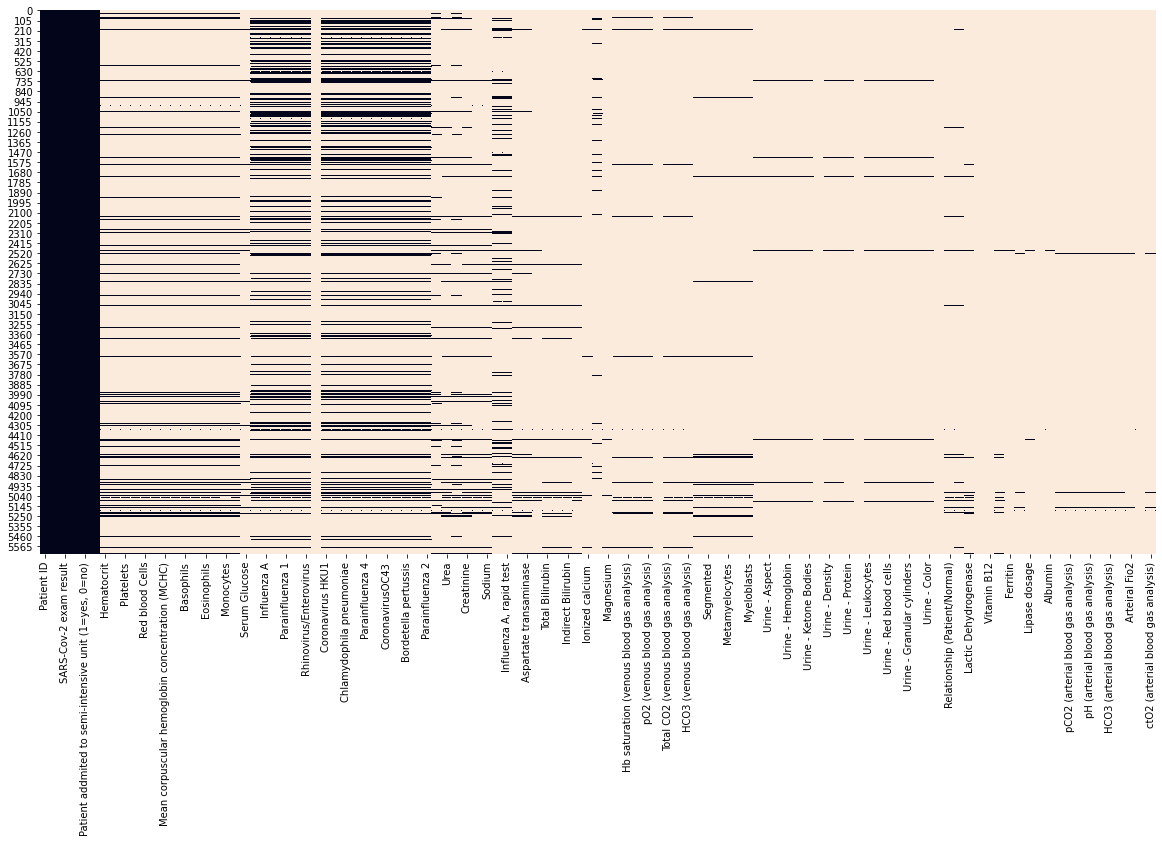

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar= False)

In [32]:
(df.isna().sum()/df.shape[0]).sort_values() 

Patient ID                                               0.0
Patient age quantile                                     0.0
SARS-Cov-2 exam result                                   0.0
Patient addmited to regular ward (1=yes, 0=no)           0.0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.0
                                                        ... 
Partial thromboplastin time (PTT)                        1.0
Urine - Sugar                                            1.0
Mycoplasma pneumoniae                                    1.0
D-Dimer                                                  1.0
Prothrombin time (PT), Activity                          1.0
Length: 111, dtype: float64

In [46]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]

<AxesSubplot:>

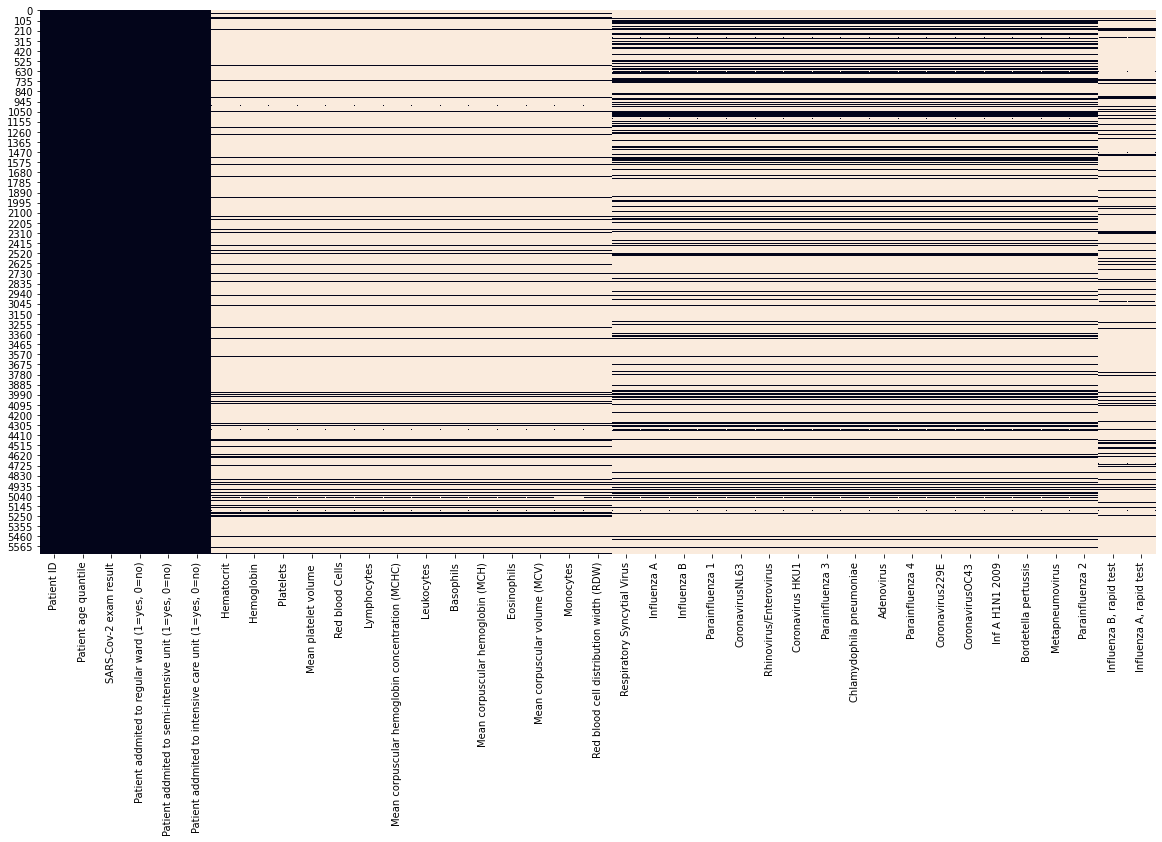

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar= False)

In [49]:
df = df.drop(['Patient ID'], axis =1)

In [62]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

<Figure size 432x288 with 0 Axes>

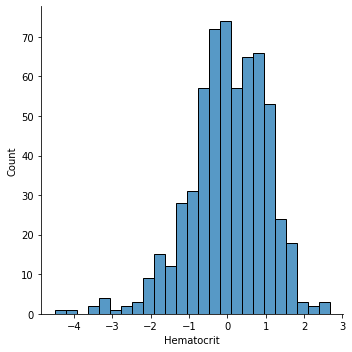

<Figure size 432x288 with 0 Axes>

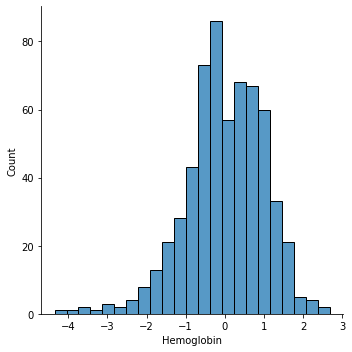

<Figure size 432x288 with 0 Axes>

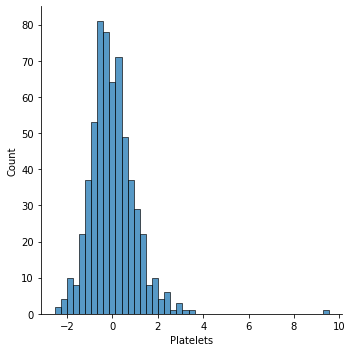

<Figure size 432x288 with 0 Axes>

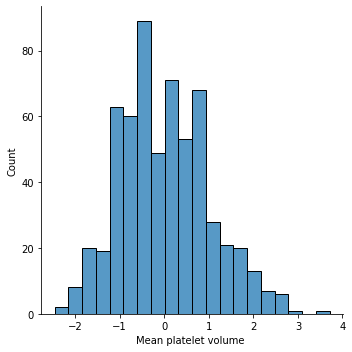

<Figure size 432x288 with 0 Axes>

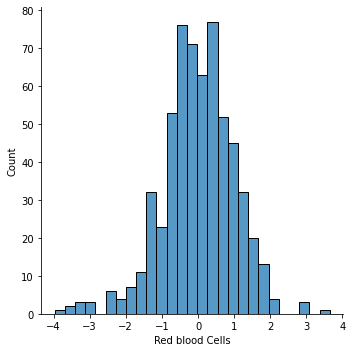

<Figure size 432x288 with 0 Axes>

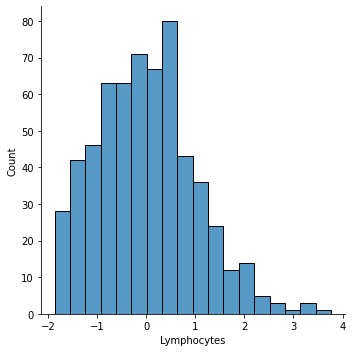

<Figure size 432x288 with 0 Axes>

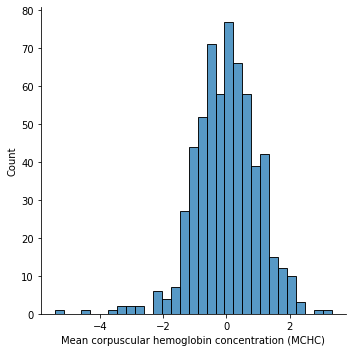

<Figure size 432x288 with 0 Axes>

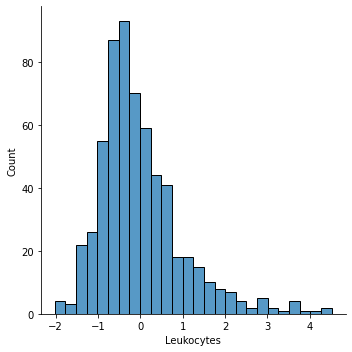

<Figure size 432x288 with 0 Axes>

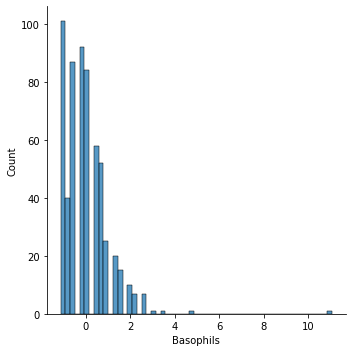

<Figure size 432x288 with 0 Axes>

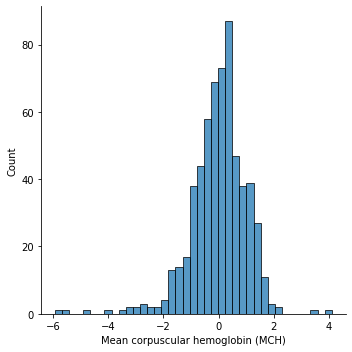

<Figure size 432x288 with 0 Axes>

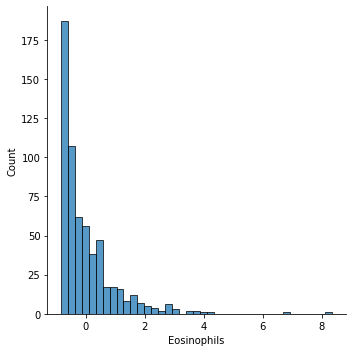

<Figure size 432x288 with 0 Axes>

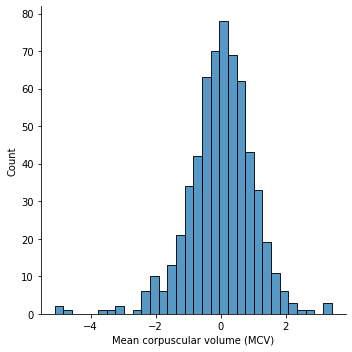

<Figure size 432x288 with 0 Axes>

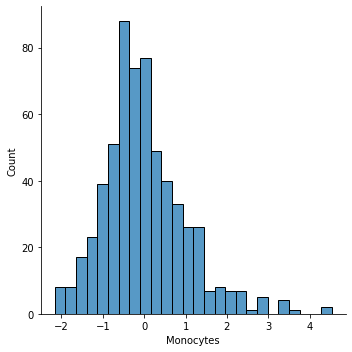

<Figure size 432x288 with 0 Axes>

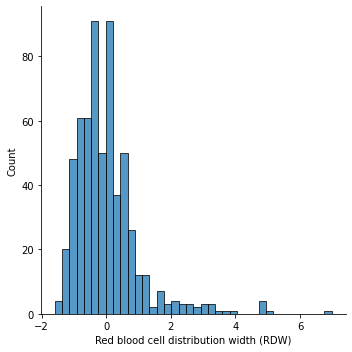

In [143]:
for col in df.select_dtypes(float):
    plt.figure()
    sns.displot(df[col])

<Figure size 720x720 with 0 Axes>

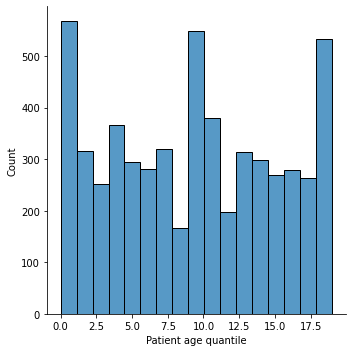

In [74]:
plt.figure(figsize=(10,10))
sns.displot(df['Patient age quantile'])

### Variables Qualitatives

In [76]:
df['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [83]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

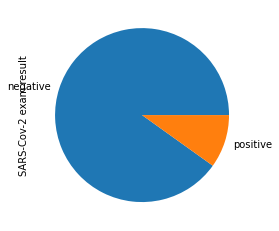

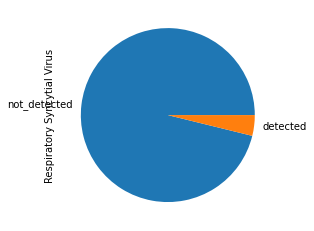

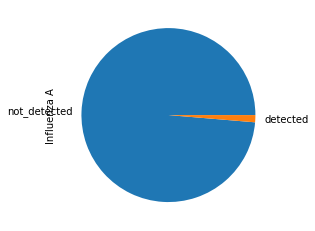

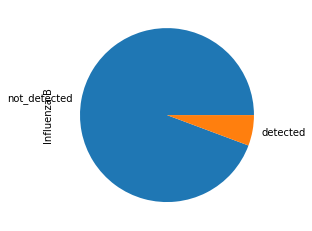

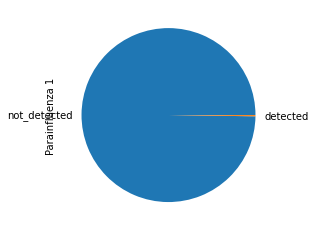

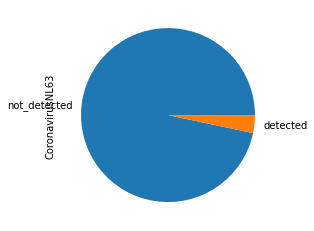

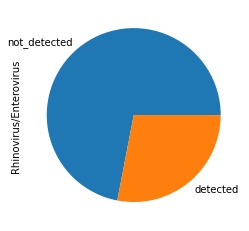

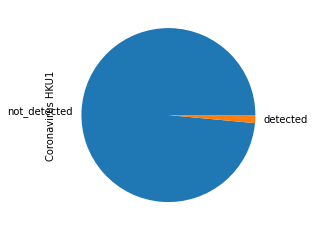

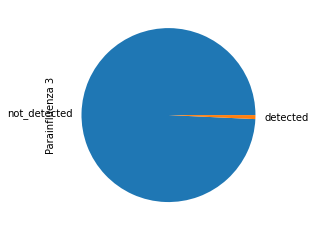

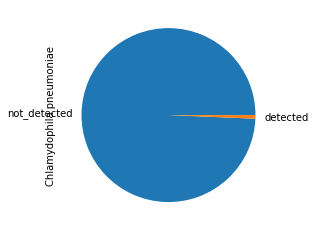

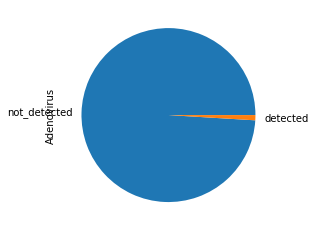

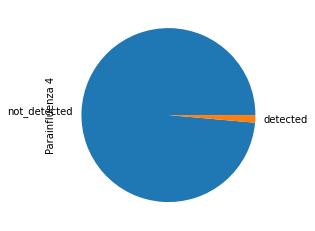

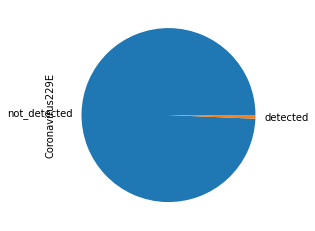

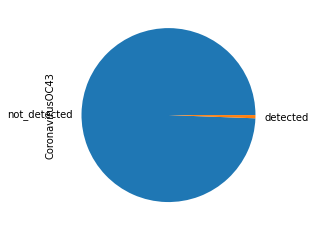

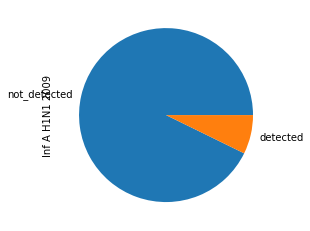

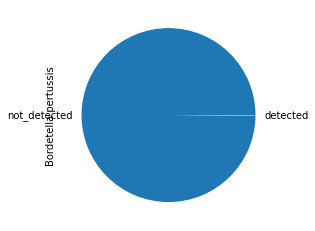

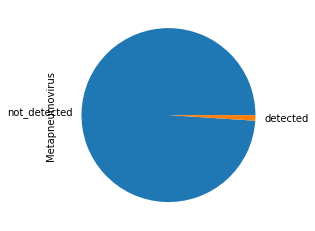

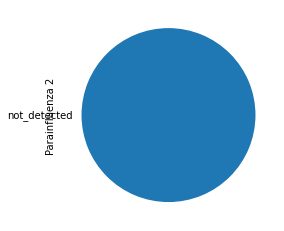

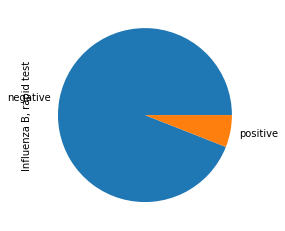

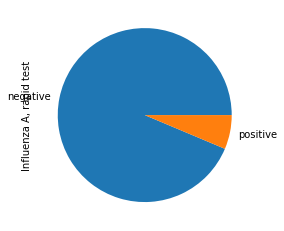

In [84]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [88]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [89]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creation des ensembles viral et blood

In [93]:
missing_rate = df.isna().sum()/df.shape[0]

In [95]:
blood_col = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [96]:
viral_col = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]


## Visualiser target / blood

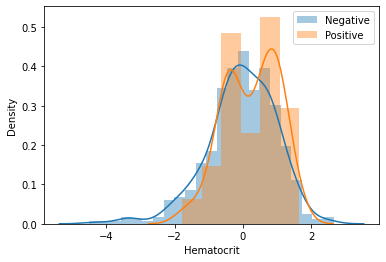

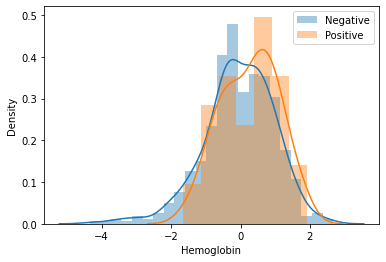

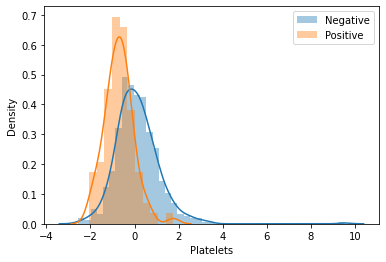

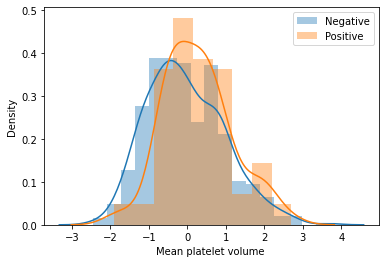

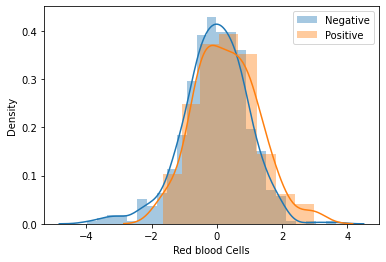

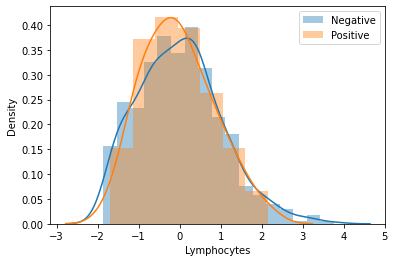

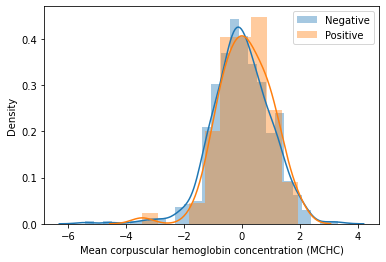

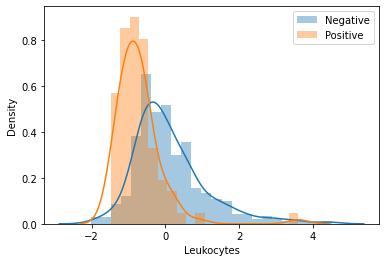

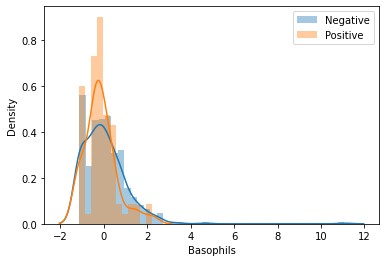

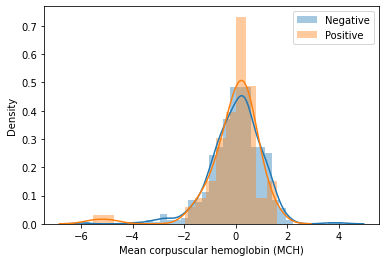

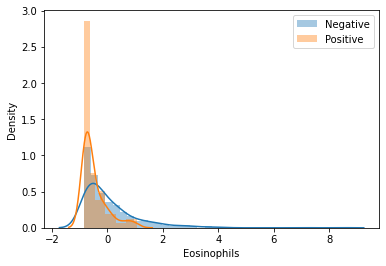

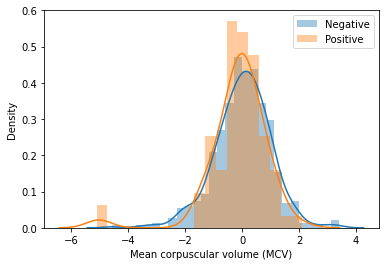

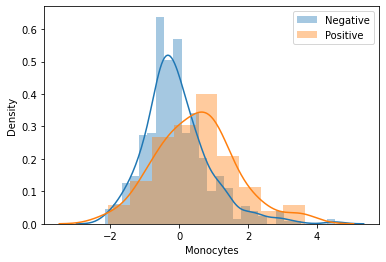

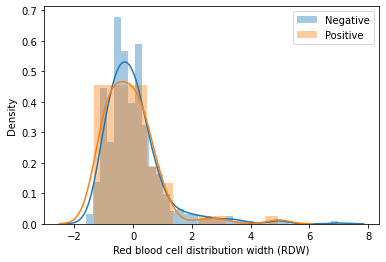

In [144]:
for col in blood_col:
    plt.figure()
    sns.distplot(negative_df[col], label='Negative')
    sns.distplot(positive_df[col], label='Positive')
    plt.legend()

**Target / age**

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

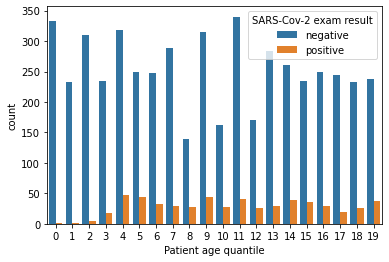

In [115]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

## Relation Target / viral :



In [116]:
pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

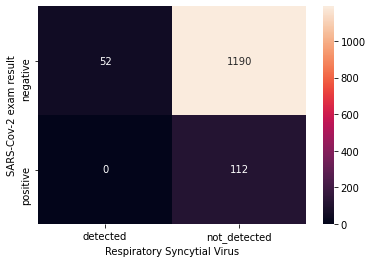

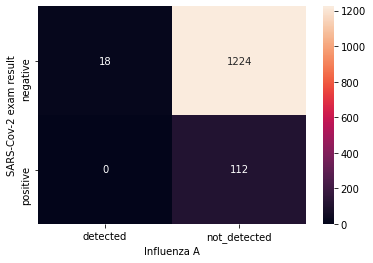

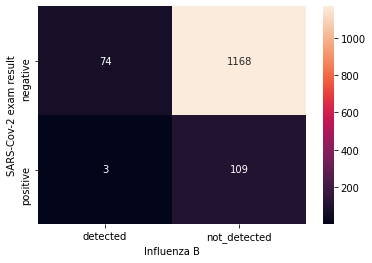

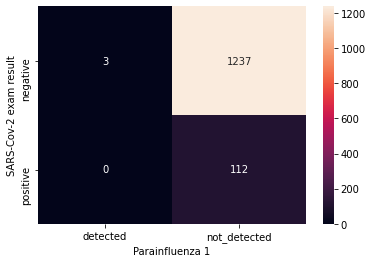

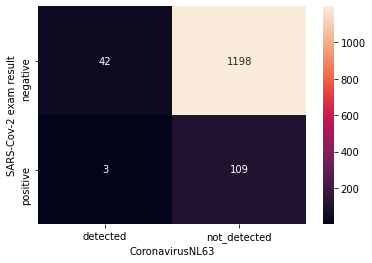

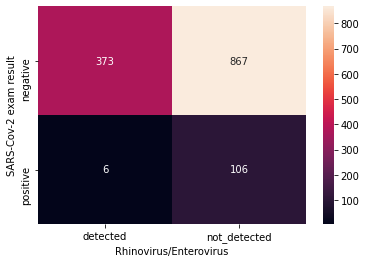

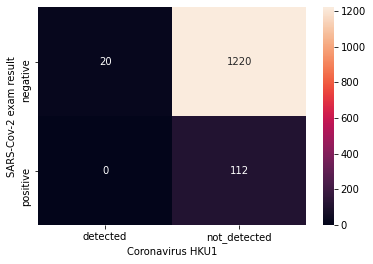

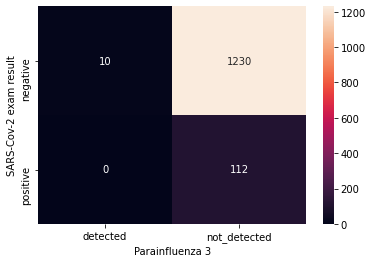

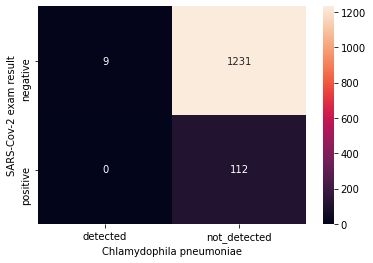

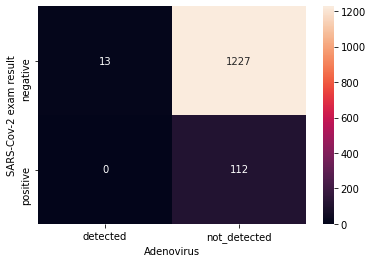

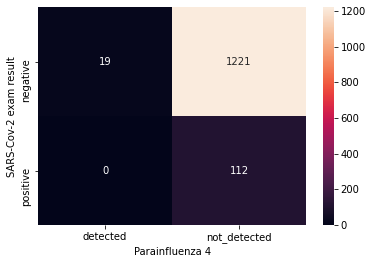

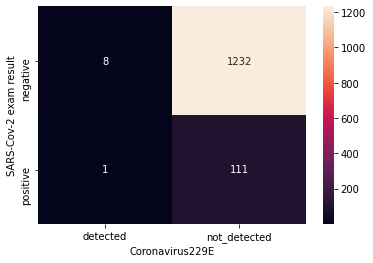

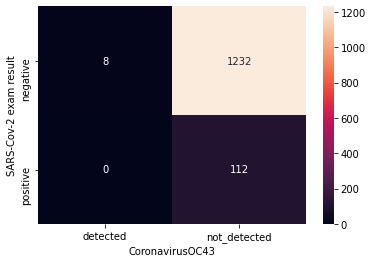

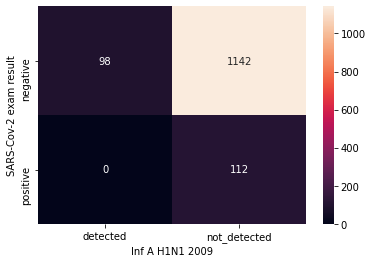

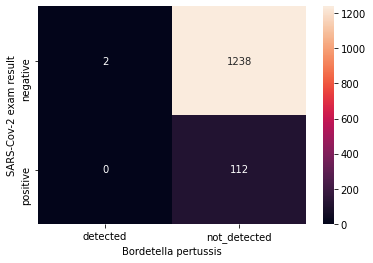

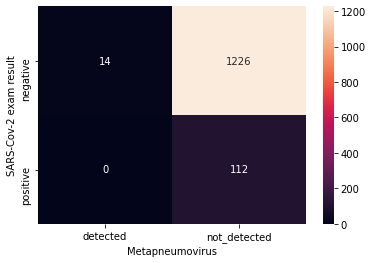

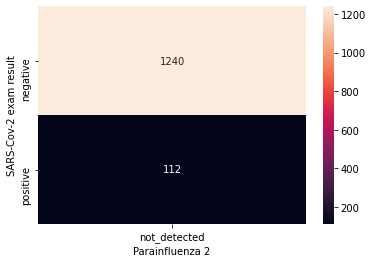

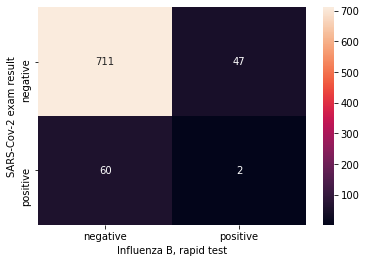

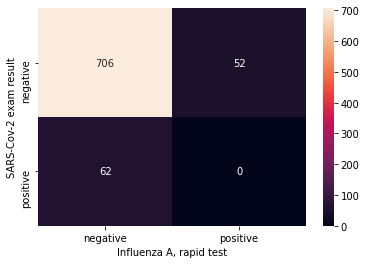

In [118]:
for col in viral_col:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]), annot=True, fmt='d')

## Taux Sanguin

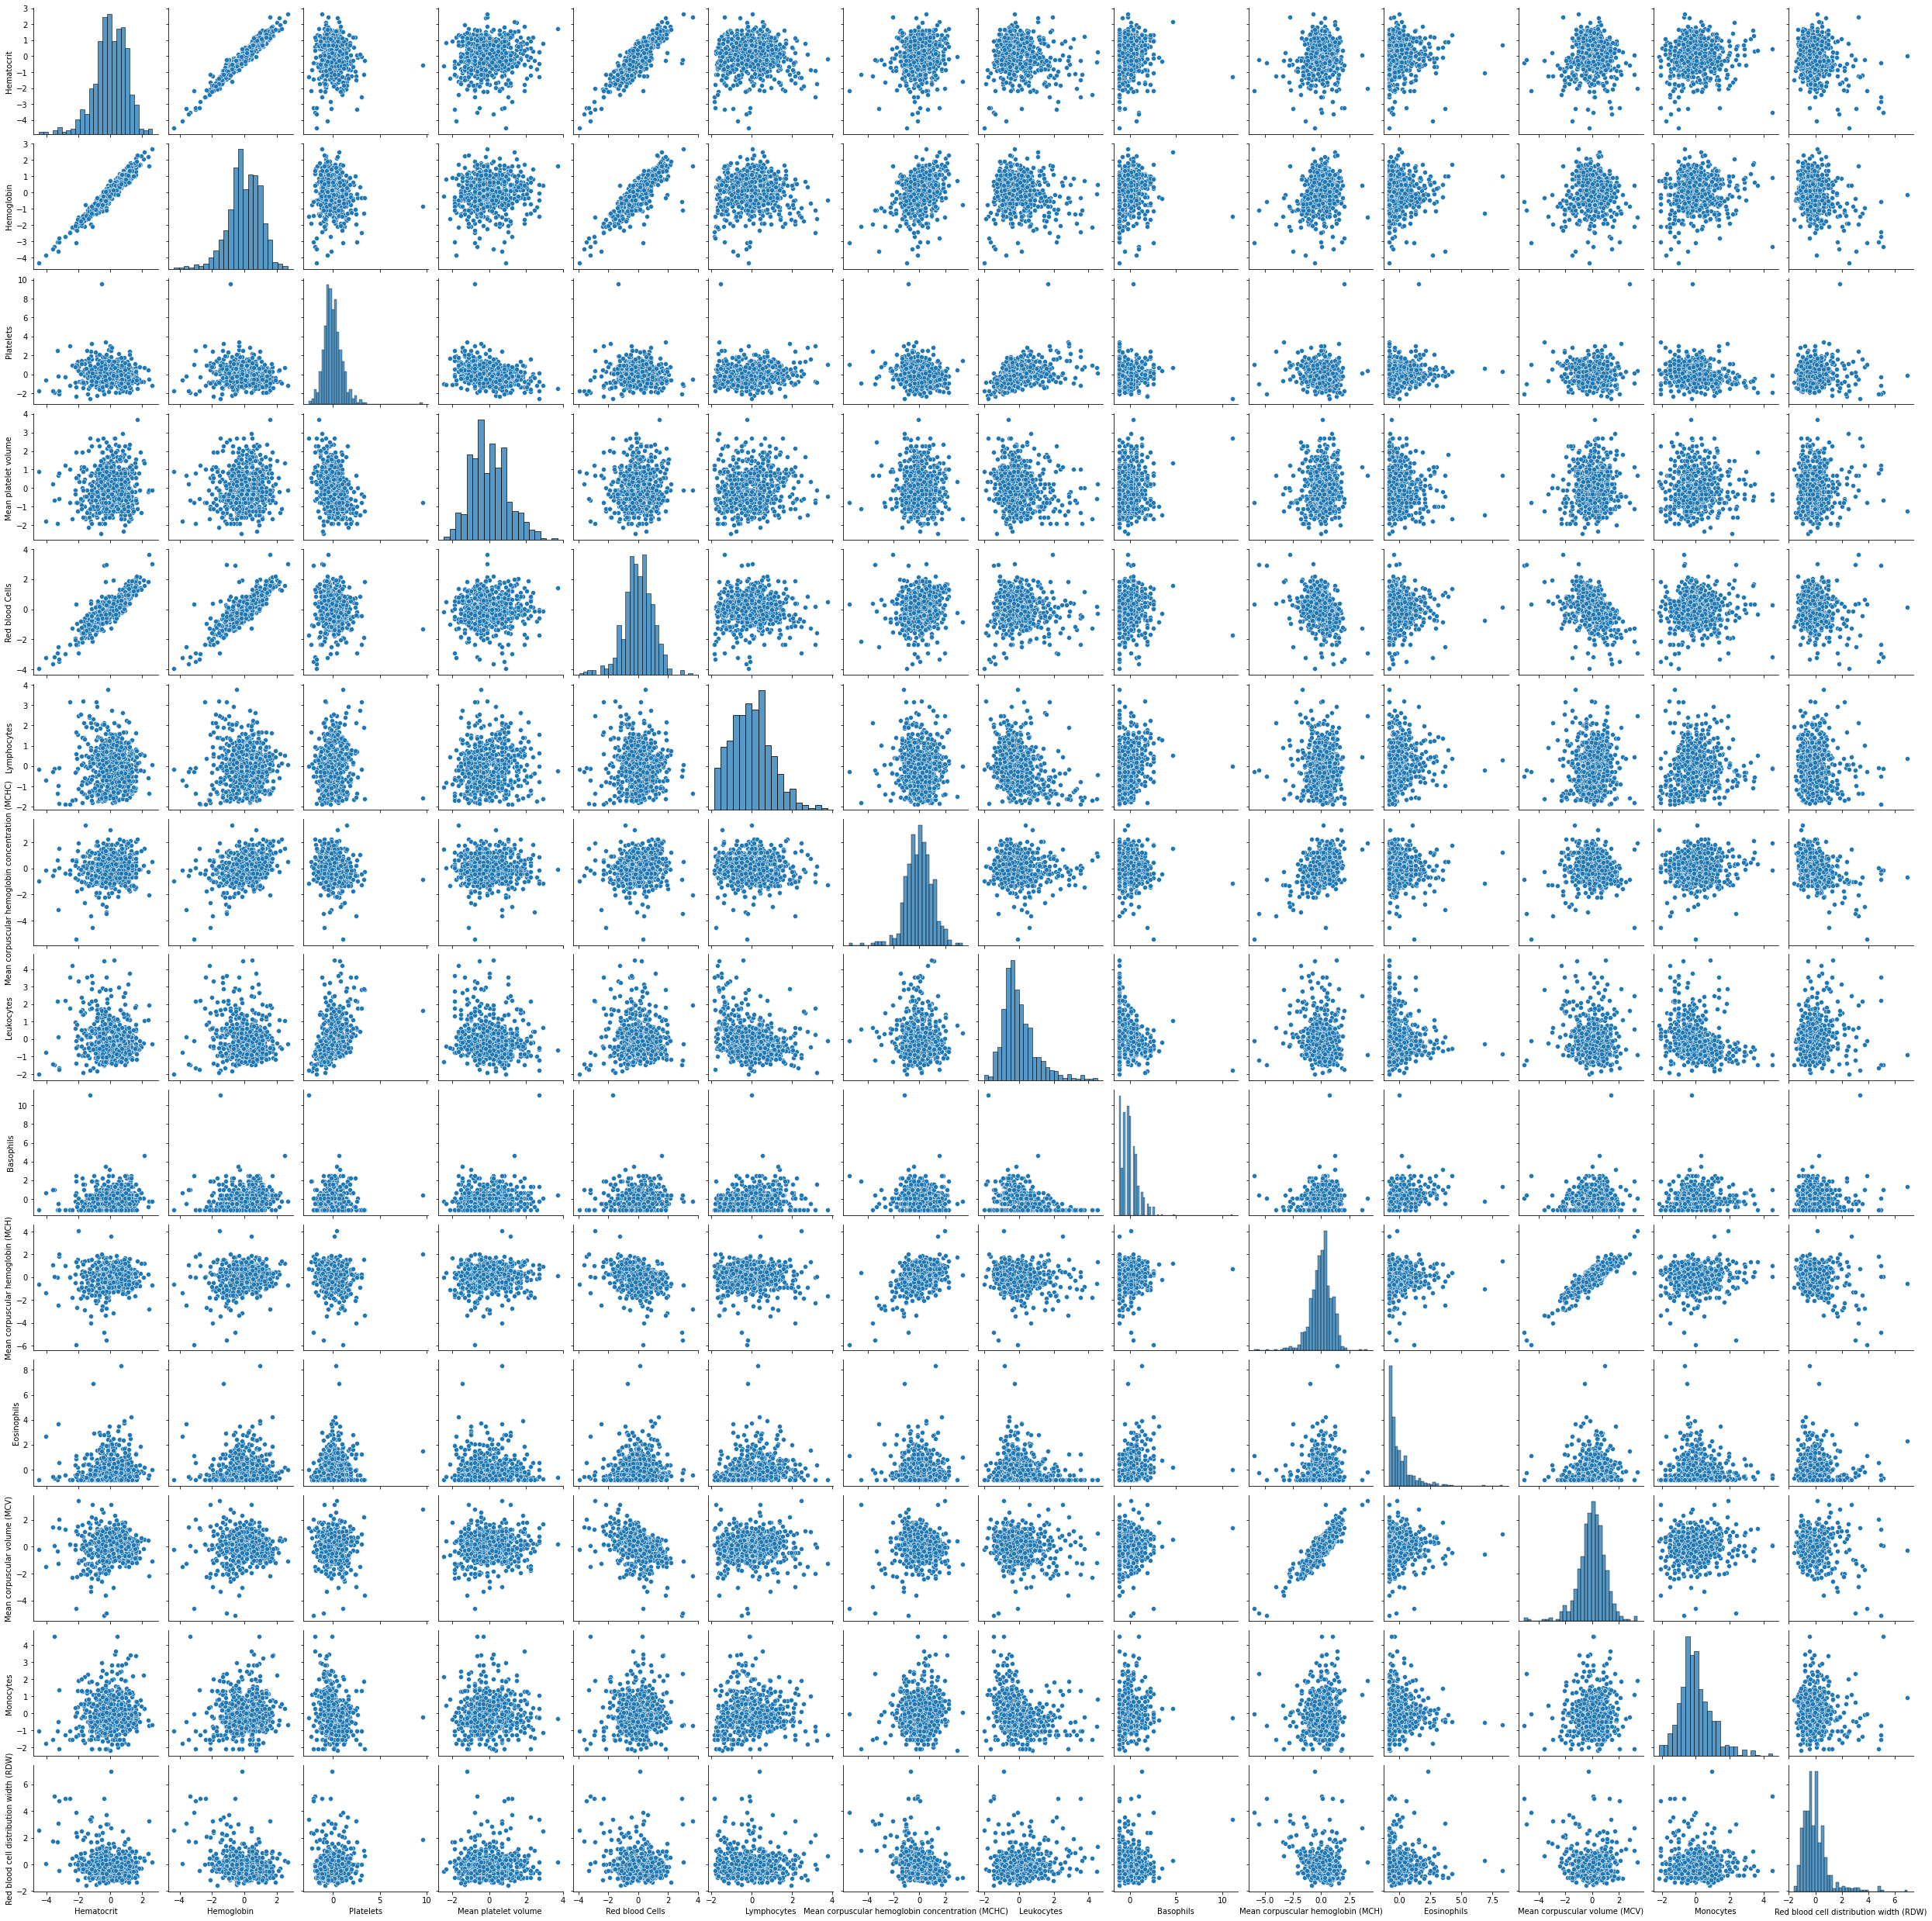

In [120]:
sns.pairplot(df[blood_col])

<AxesSubplot:>

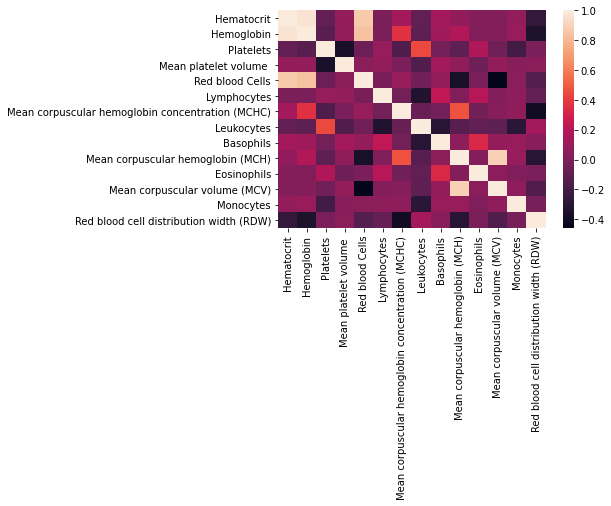

In [121]:
sns.heatmap(df[blood_col].corr())

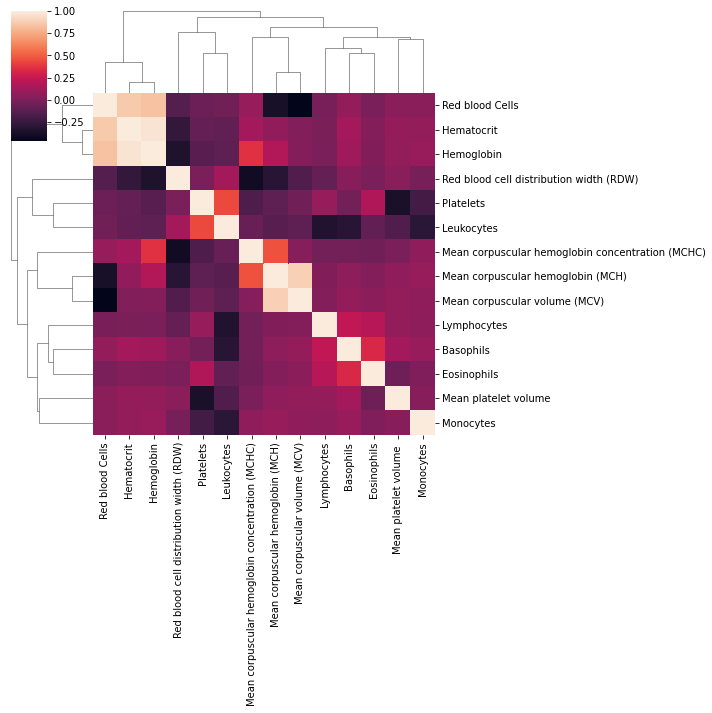

In [122]:
sns.clustermap(df[blood_col].corr())

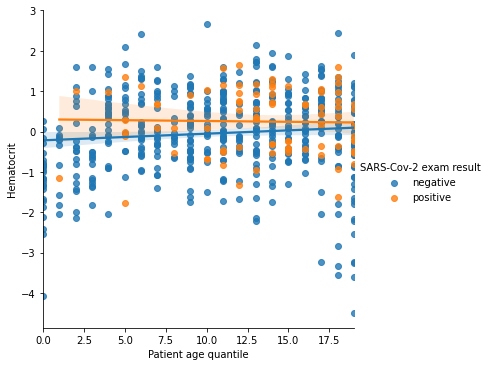

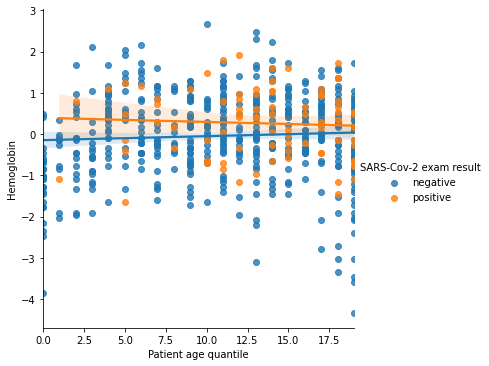

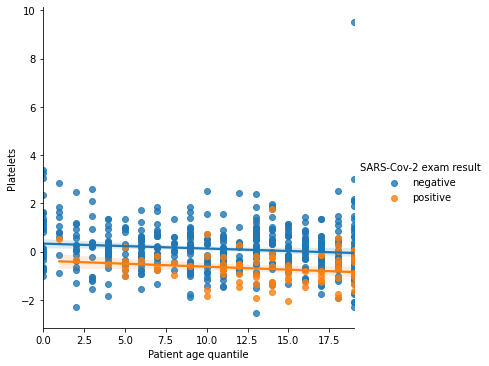

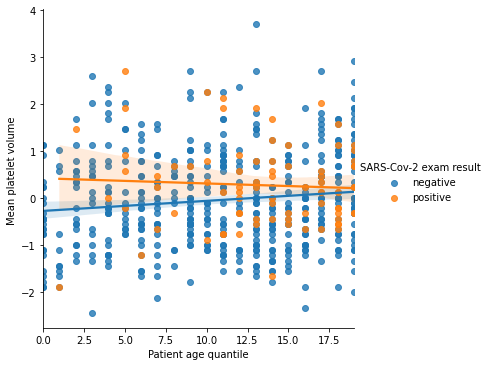

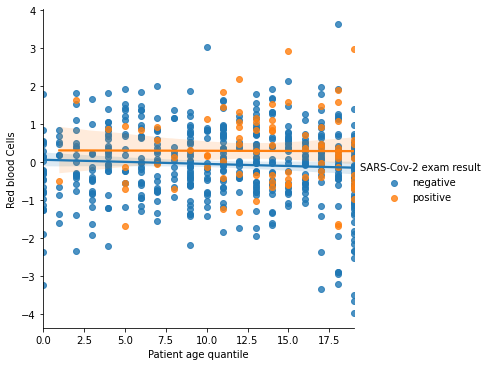

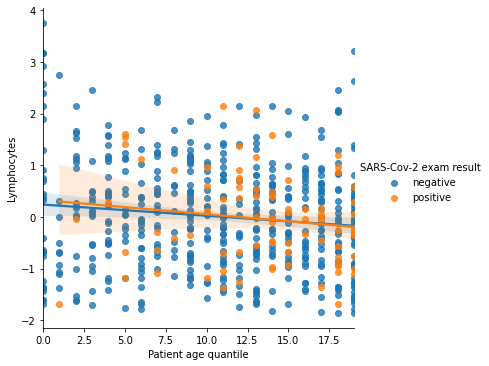

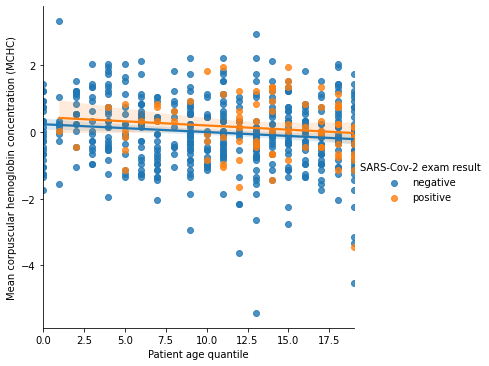

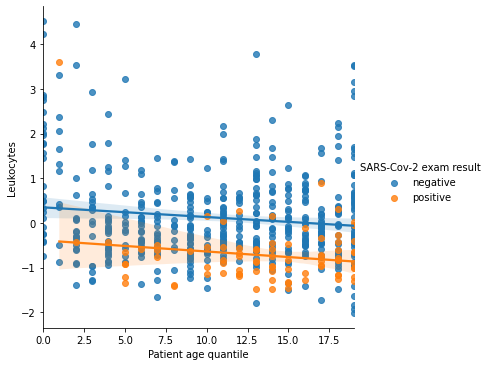

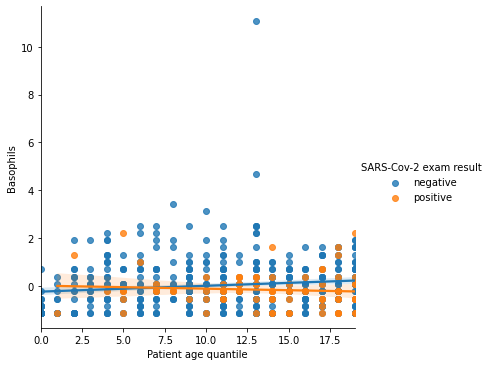

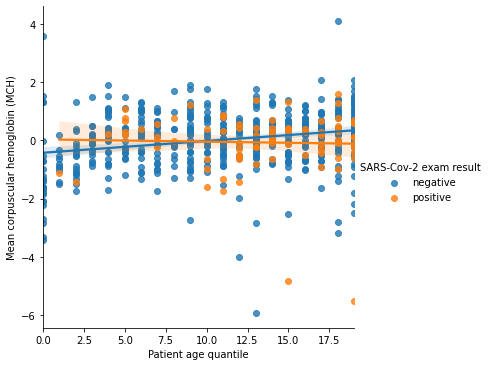

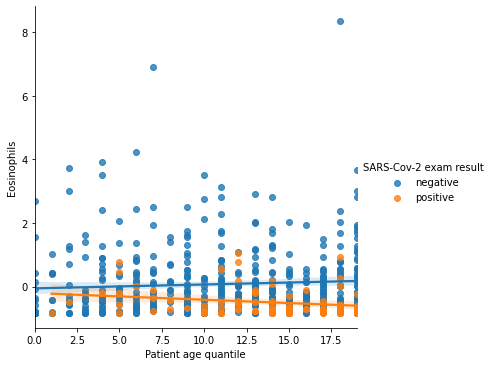

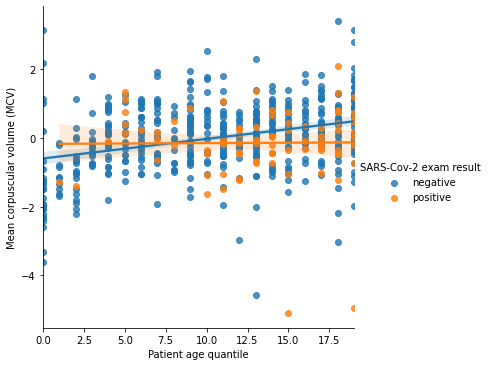

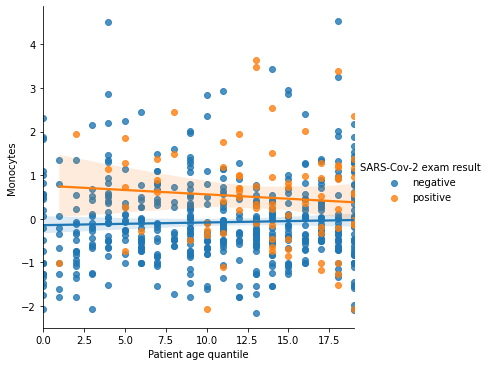

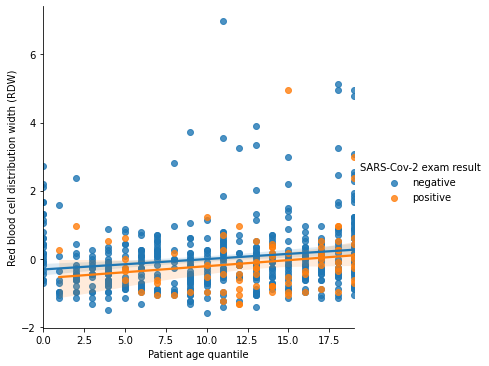

In [123]:
for col in blood_col:
    plt.figure
    sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

In [147]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
est_maalde                                              -0.090915
est_malade                                              -0.090915
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean plate

## viral / sanguin

In [138]:
df['est_malade']=np.sum(df[viral_col[: -2]] == 'detected',axis=1)>=1

In [139]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
0              NaN              NaN              NaN                   NaN   
1     not_detected     not_detected     not_detected          not_detected   
2              NaN              NaN              NaN                   NaN   
3              NaN              NaN              NaN                   NaN   
4     not_detected     not_detected     not_detected          not_detected   

   Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
0              NaN              NaN                      NaN   
1     not_detected     not_detected                 negative   
2              NaN              NaN                      NaN   
3              NaN              NaN                      NaN   
4     not_detected     not_detected                      NaN   

   Influenza A, rapid test  est_maalde est_malade  
0                      NaN       False      False  
1                 negative        True       True  
2                      NaN       False      False  
3                      NaN       False      False  
4                      NaN        True       True  

[5 rows x 40 columns]

In [140]:
malade_df = df[df['est_malade']== True]
non_malade_df= df[df['est_malade']==False]

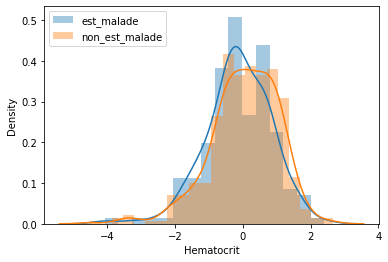

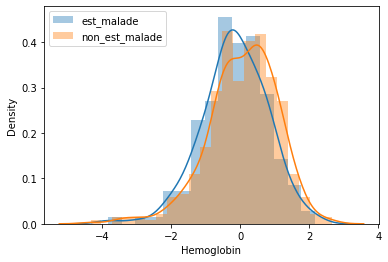

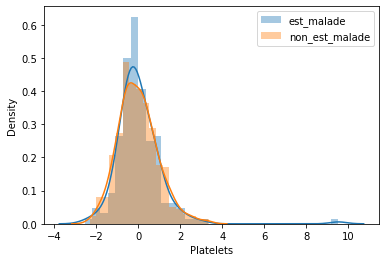

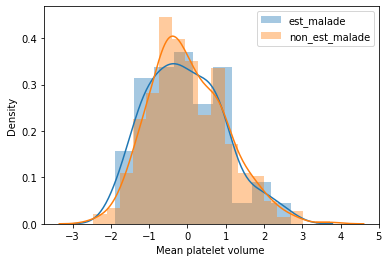

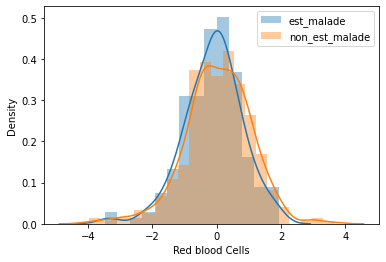

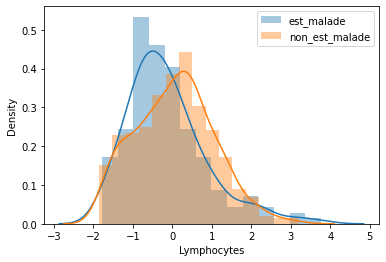

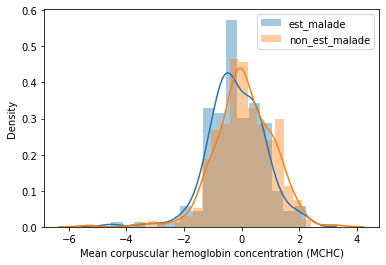

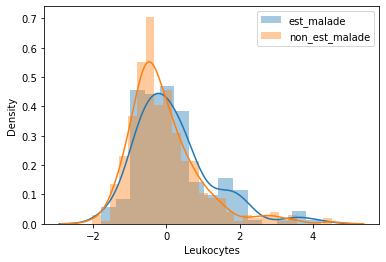

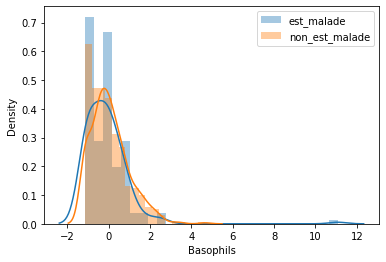

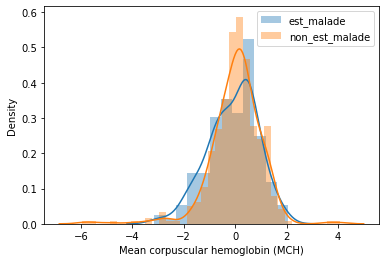

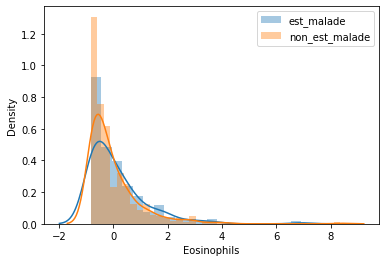

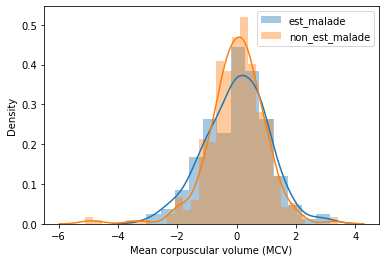

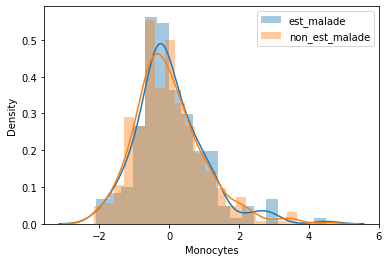

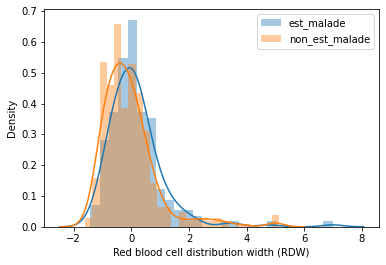

In [145]:
for col in blood_col:
    plt.figure()
    sns.distplot(malade_df[col], label ='est_malade')
    sns.distplot(non_malade_df[col], label ='non_est_malade')
    plt.legend()
    

In [153]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif df ['Patient addmited to semi-intensive unit (1=yes, 0=no)'] ==1:
        return 'semi-intense'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'intense'
    else : 
        return 'inconnu'

In [155]:
df['statut'] = df.apply(hospitalisation, axis =1)

In [156]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  Metapneumovirus  \
0              NaN              NaN                   NaN              NaN   
1     not_detected     not_detected          not_detected     not_detected   
2              NaN              NaN                   NaN              NaN   
3              NaN              NaN                   NaN              NaN   
4     not_detected     not_detected          not_detected     not_detected   

   Parainfluenza 2  Influenza B, rapid test  Influenza A, rapid test  \
0              NaN                      NaN                      NaN   
1     not_detected                 negative                 negative   
2              NaN                      NaN                      NaN   
3              NaN                      NaN                      NaN   
4     not_detected                      NaN                      NaN   

   est_maalde  est_malade   statut  
0       False       False  inconnu  
1        True        True  inconnu  
2       False       False  inconnu  
3       False       False  inconnu  
4        True        True  inconnu  

[5 rows x 41 columns]

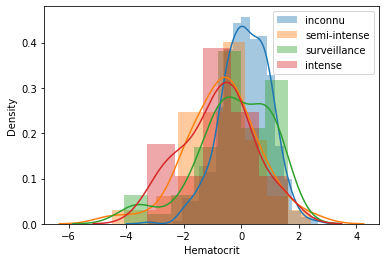

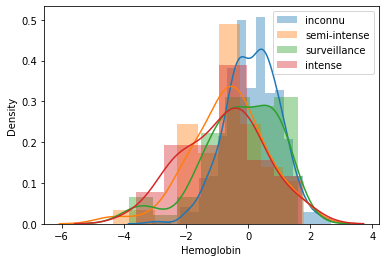

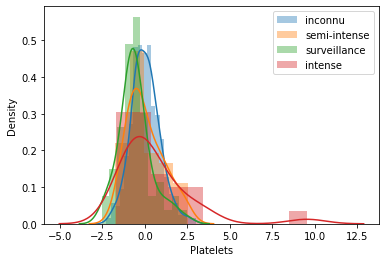

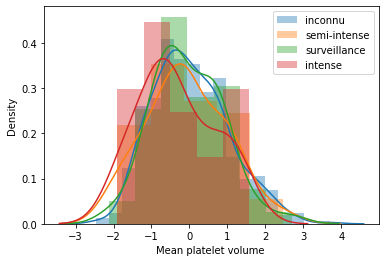

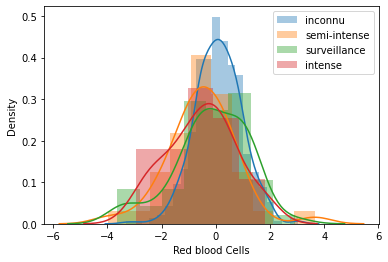

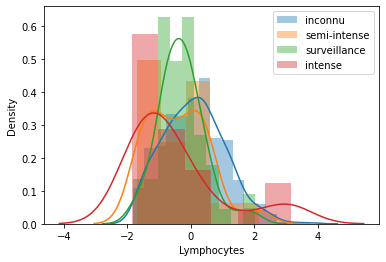

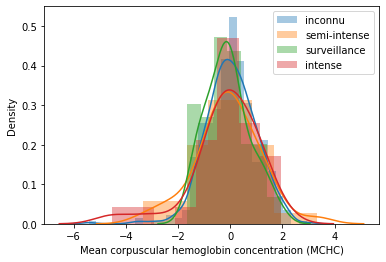

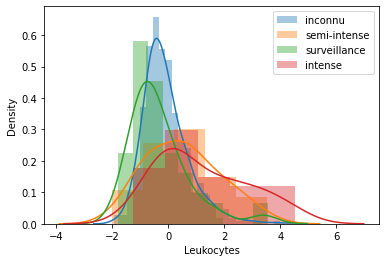

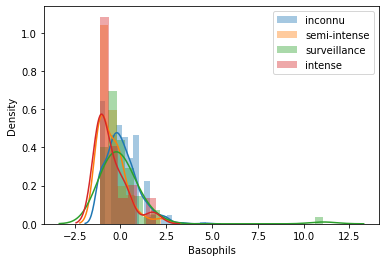

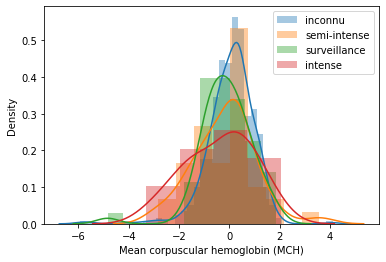

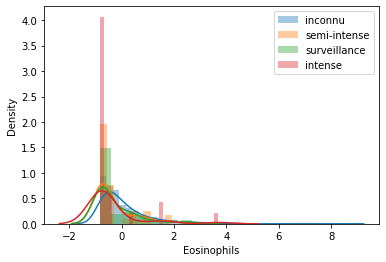

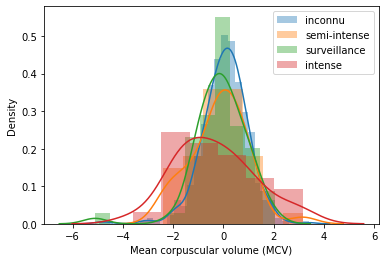

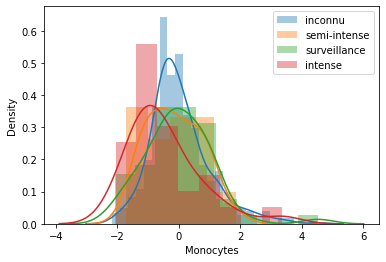

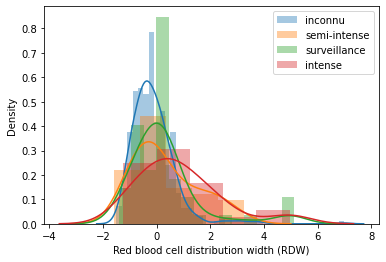

In [158]:
for col in blood_col:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']== cat][col], label = cat)
    plt.legend()

In [159]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)           

### Rapport negative et positive de chacune de nos deux groupe

In [161]:
df2= df [blood_col] 
df2['covid']= df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize = True)

negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [162]:
df2= df [viral_col] 
df2['covid']= df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize = True)

negative    0.928302
positive    0.071698
Name: covid, dtype: float64

## T-test

In [165]:
from scipy.stats import ttest_ind

In [182]:
positive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  ...  \
67           NaN        NaN                    NaN              NaN  ...   
284          NaN        NaN                    NaN              NaN  ...   
513          NaN        NaN                    NaN              NaN  ...   
568     0.792188  -0.341548               1.469188         1.653476  ...   
676          NaN        NaN                    NaN              NaN  ...   
...          ...        ...                    ...              ...  ...   
5632         NaN        NaN                    NaN              NaN  ...   
5633         NaN        NaN                    NaN              NaN  ...   
5634         NaN        NaN                    NaN              NaN  ...   
5639         NaN        NaN                    NaN              NaN  ...   
5643    0.541564  -0.906829              -0.325903         0.578024  ...   

        Adenovirus  Parainfluenza 4  Coronavirus229E  CoronavirusOC43  \
67             NaN              NaN              NaN

In [168]:
negative_df.shape

(5086, 38)

In [173]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [183]:
def t_test(col):
    alpha = 0.02
    start, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 refuted'
    else:
        return 0

In [184]:
for col in blood_col:
    print(f'{col :-<50}{t_test(col)}')

Hematocrit----------------------------------------H0 refuted
Hemoglobin----------------------------------------H0 refuted
Platelets-----------------------------------------H0 refuted
Mean platelet volume -----------------------------0
Red blood Cells-----------------------------------H0 refuted
Lymphocytes---------------------------------------0
Mean corpuscular hemoglobin concentration (MCHC)--0
Leukocytes----------------------------------------H0 refuted
Basophils-----------------------------------------0
Mean corpuscular hemoglobin (MCH)-----------------0
Eosinophils---------------------------------------H0 refuted
Mean corpuscular volume (MCV)---------------------0
Monocytes-----------------------------------------H0 refuted
Red blood cell distribution width (RDW)-----------0


# Pre-Processing

In [185]:
df1 = data.copy()

In [186]:
df1.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

## Creation des sous-ensemble

In [187]:
missing_rate = df.isna().sum()/df.shape[0]

In [189]:
missing_rate

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophil

In [196]:
viral_colums = list(df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])
blood_colums = list(df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])

In [199]:
key_col = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [200]:
df = df[key_col + viral_colums + blood_colums]
df.head()

Patient age quantile SARS-Cov-2 exam result Respiratory Syncytial Virus  \
0                    13               negative                         NaN   
1                    17               negative                not_detected   
2                     8               negative                         NaN   
3                     5               negative                         NaN   
4                    15               negative                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  ...  \
0                    NaN              NaN             NaN  ...   
1               detected     not_detected    not_detected  ...   
2                    NaN              NaN             NaN  ...   
3                    NaN              NaN             NaN  ...   
4               detected     not_detected    not_detected  ...   

  Red blood Cells Lymphocytes  \
0             NaN         NaN   
1        0.102004    0.318366   
2             NaN         NaN   
3             NaN         NaN   
4             NaN         NaN   

  Mean corpuscular hemoglobin concentration (MCHC) Leukocytes Basophils  \
0                                              NaN        NaN       NaN   
1                                         -0.95079   -0.09461 -0.223767   
2                                              NaN        NaN       NaN   
3                                              NaN        NaN       NaN   
4                                              NaN        NaN       NaN   

  Mean corpuscular hemoglobin (MCH) Eosinophils Mean corpuscular volume (MCV)  \
0                               NaN         NaN                           NaN   
1                         -0.292269    1.482158                      0.166192   
2                               NaN         NaN                           NaN   
3                               NaN         NaN                           NaN   
4                               NaN         NaN                           NaN   

  Monocytes Red blood cell distribution width (RDW)  
0       NaN                                     NaN  
1  0.357547                               -0.625073  
2       NaN                                     NaN  
3       NaN                                     NaN  
4       NaN                                     NaN  

[5 rows x 35 columns]

## Train-Test, Netoyagae, Encodage

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [261]:
trainset['SARS-Cov-2 exam result'].value_counts()

0.0    4068
Name: SARS-Cov-2 exam result, dtype: int64

In [262]:
testset['SARS-Cov-2 exam result'].value_counts()

0.0    1018
Name: SARS-Cov-2 exam result, dtype: int64

## Encodage

In [281]:
def encodage (df):
    code = {'postive' :1, 'negative' : 0, 'detected' :1, 'not detected' : 0}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df
    

In [282]:
def imputation(df):
    return df.dropna(axis=0)

In [279]:
def preprocessing (df) :
    df = encodage(df)
    df = imputation(df)
    
    x = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(y.value_counts())
    
    return x,y

In [280]:
x_train, y_train = preprocessing(trainset)

AttributeError: 'DataFrame' object has no attribute 'colums'